# Reto -> Entrega 1 Limpieza, análisis, visualización y kmeans
# Alumno: Luis José Navarrete Baduy, Rodrigo López Aguilera
# Matrícula: A01793919, A01793071
# Profesor: Maria de la Paz Rico
# Fecha: 16 de noviembre del 2022

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('../data/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding='ISO-8859-1')
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


## Limpiando el dataset

In [9]:
columnas_remover = ['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO', 'ACUIFERO', 
'SUBTIPO', 'PERIODO', 'SDT_mg/L', 'CD_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L',
'COLI_FEC_NMP/100_mL', 'AS_TOT_mg/L', 'CR_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L'
]
df.drop(columnas_remover, axis=1, inplace=True)
# ALC_mg/L	CONDUCT_mS/cm	SDT_M_mg/L	DUR_mg/L	N_NO3_mg/L

In [10]:
df.head()

,LONGITUD,LATITUD,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,-102.02210,22.20887,229.990,Alta,940.0,Permisible para riego,603.6,Cultivos sensibles,Potable - Dulce,0.9766,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,-102.20075,21.99958,231.990,Alta,608.0,Buena para riego,445.4,Excelente para riego,Potable - Dulce,0.9298,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,-102.28801,22.36685,204.920,Alta,532.0,Buena para riego,342,Excelente para riego,Potable - Dulce,1.8045,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,-102.29449,22.18435,327.000,Alta,686.0,Buena para riego,478.6,Excelente para riego,Potable - Dulce,1.1229,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,-110.24480,23.45138,309.885,Alta,1841.0,Permisible para riego,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [11]:
# REPLACE VALUES FOR THESE COLUMNS
df = df[df['SDT_M_mg/L'] != '<25']
df = df[df['DUR_mg/L'] != '<20']
df['N_NO3_mg/L'].replace('<0.02', 0, inplace=True)
df['FLUORUROS_mg/L'].replace('<0.2', 0, inplace=True)
df['CONTAMINANTES'] = df['CONTAMINANTES'].fillna('NINGUNO')
df.dropna(inplace=True)

df = df.astype({'SDT_M_mg/L':'float32', 'N_NO3_mg/L':'float32', 'DUR_mg/L':'float32', 'FLUORUROS_mg/L': 'float32'})

In [12]:
df.isna().sum()

LONGITUD                0
LATITUD                 0
ALC_mg/L                0
CALIDAD_ALC             0
CONDUCT_mS/cm           0
CALIDAD_CONDUC          0
SDT_M_mg/L              0
CALIDAD_SDT_ra          0
CALIDAD_SDT_salin       0
FLUORUROS_mg/L          0
CALIDAD_FLUO            0
DUR_mg/L                0
CALIDAD_DUR             0
CALIDAD_COLI_FEC        0
N_NO3_mg/L              0
CALIDAD_N_NO3           0
CALIDAD_AS              0
CALIDAD_CD              0
CALIDAD_CR              0
CALIDAD_HG              0
CALIDAD_PB              0
CALIDAD_MN              0
CALIDAD_FE              0
SEMAFORO                0
CONTAMINANTES           0
CUMPLE_CON_ALC          0
CUMPLE_CON_COND         0
CUMPLE_CON_SDT_ra       0
CUMPLE_CON_SDT_salin    0
CUMPLE_CON_FLUO         0
CUMPLE_CON_DUR          0
CUMPLE_CON_CF           0
CUMPLE_CON_NO3          0
CUMPLE_CON_AS           0
CUMPLE_CON_CD           0
CUMPLE_CON_CR           0
CUMPLE_CON_HG           0
CUMPLE_CON_PB           0
CUMPLE_CON_M

In [13]:
numerics = ['int64', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df.select_dtypes(include=numerics)
df_numeric.head()

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,N_NO3_mg/L
0,-102.02210,22.20887,229.990,940.0,603.599976,0.9766,213.731995,4.184656
1,-102.20075,21.99958,231.990,608.0,445.399994,0.9298,185.051407,5.750110
2,-102.28801,22.36685,204.920,532.0,342.000000,1.8045,120.719002,1.449803
3,-102.29449,22.18435,327.000,686.0,478.600006,1.1229,199.878998,1.258597
4,-110.24480,23.45138,309.885,1841.0,1179.000000,0.2343,476.987213,15.672251


In [14]:
df_numeric.isna().sum()

LONGITUD          0
LATITUD           0
ALC_mg/L          0
CONDUCT_mS/cm     0
SDT_M_mg/L        0
FLUORUROS_mg/L    0
DUR_mg/L          0
N_NO3_mg/L        0
dtype: int64

In [15]:
df_numeric.describe()

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,N_NO3_mg/L
count,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,-101.792651,23.123511,233.815209,1151.697473,906.500061,0.911433,357.908508,4.375707
std,6.743235,3.872955,109.932567,1261.181043,2798.165527,1.294527,361.593567,8.453892
min,-116.664250,14.561150,26.640000,110.000000,101.199997,0.000000,21.940599,0.000000
25%,-105.355883,20.201480,165.000000,506.000000,339.000000,0.266200,127.487999,0.667926
50%,-102.152250,22.587240,215.830000,824.000000,556.000000,0.495900,257.295990,2.105194
75%,-98.949320,25.504700,291.720000,1337.000000,925.599976,1.074000,464.618286,5.249500
max,-86.864120,32.677713,1650.000000,18577.000000,82170.000000,15.424300,3810.692139,121.007812


In [16]:
target = ['SEMAFORO']
features = [v for v in df.columns.values.tolist() if v not in target]
target_df = df[target]
features_df = df[features]

In [17]:
not_numeric_cols = [key for key in dict(features_df.dtypes) if dict(features_df.dtypes)[key] not in numerics]
new_numeric_df = pd.get_dummies(features_df, prefix=not_numeric_cols)

In [18]:
final_df = new_numeric_df.copy()
final_df['SEMAFORO'] = target_df
final_df.to_csv('../data/data_subterraneos_clean.csv', encoding='ISO-8859-1', index=False)

In [19]:
final_df.dtypes

LONGITUD            float64
LATITUD             float64
ALC_mg/L            float64
CONDUCT_mS/cm       float64
SDT_M_mg/L          float32
                     ...   
CUMPLE_CON_MN_NO      uint8
CUMPLE_CON_MN_SI      uint8
CUMPLE_CON_FE_NO      uint8
CUMPLE_CON_FE_SI      uint8
SEMAFORO             object
Length: 213, dtype: object

<AxesSubplot:xlabel='ALC_mg/L'>

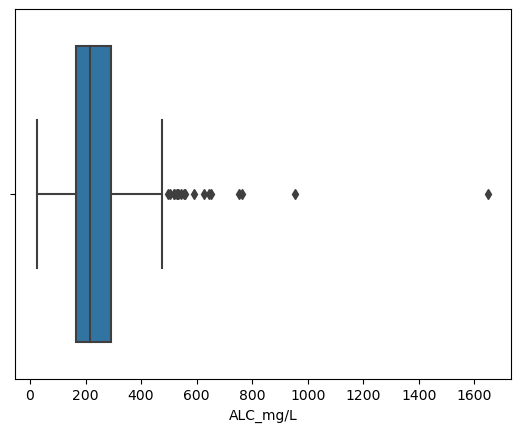

In [20]:
sns.boxplot(x=final_df['ALC_mg/L'])

In [21]:
quantile_ALC_3 = final_df['ALC_mg/L'].quantile(0.75)
outliers = (final_df['ALC_mg/L'] > quantile_ALC_3).sum()
print(f'Number of outliers {outliers}')

Number of outliers 257


<AxesSubplot:xlabel='CONDUCT_mS/cm'>

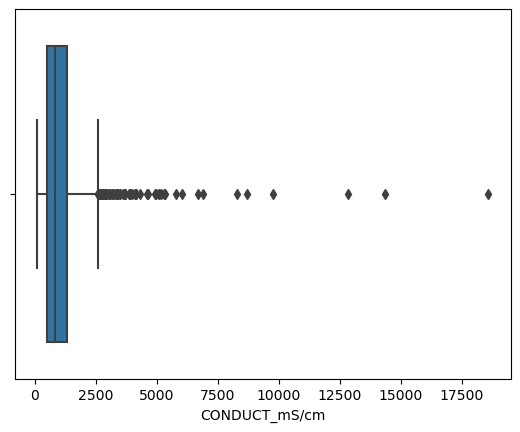

In [22]:
sns.boxplot(x=final_df['CONDUCT_mS/cm'])

In [23]:
quantile_CONDUCT_3 = final_df['CONDUCT_mS/cm'].quantile(0.75)
outliers = (final_df['CONDUCT_mS/cm'] > quantile_CONDUCT_3).sum()
print(f'Number of outliers {outliers}')

Number of outliers 257


<AxesSubplot:xlabel='SDT_M_mg/L'>

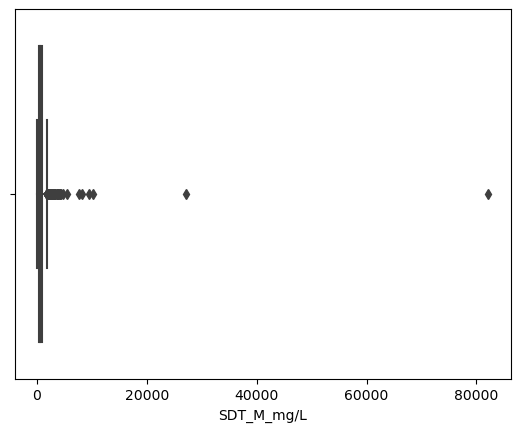

In [24]:
sns.boxplot(x=final_df['SDT_M_mg/L'])

In [25]:
quantile_SDT_M_mg_3 = final_df['SDT_M_mg/L'].quantile(0.75)
outliers = (final_df['SDT_M_mg/L'] > quantile_SDT_M_mg_3).sum()
print(f'Number of outliers {outliers}')

Number of outliers 257


<AxesSubplot:xlabel='DUR_mg/L'>

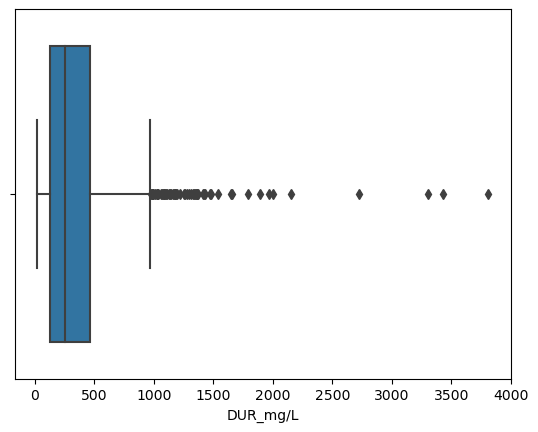

In [26]:
sns.boxplot(x=final_df['DUR_mg/L'])

In [27]:
quantile_DUR_mg_3 = final_df['DUR_mg/L'].quantile(0.75)
outliers = (final_df['DUR_mg/L'] > quantile_DUR_mg_3).sum()
print(f'Number of outliers {outliers}')

Number of outliers 257


<AxesSubplot:xlabel='N_NO3_mg/L'>

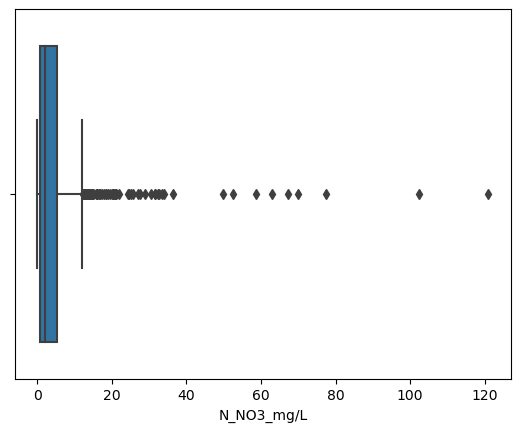

In [28]:
sns.boxplot(x=final_df['N_NO3_mg/L'])

In [29]:
quantile_N_NO3_mg_3 = final_df['N_NO3_mg/L'].quantile(0.75)
outliers = (final_df['N_NO3_mg/L'] > quantile_N_NO3_mg_3).sum()
print(f'Number of outliers {outliers}')

Number of outliers 257


<AxesSubplot:>

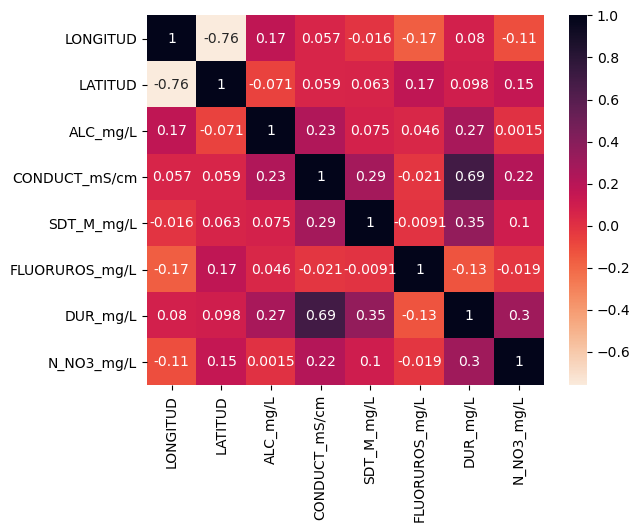

In [30]:
sns.heatmap(df_numeric.corr(), annot=True, cmap='rocket_r')

## Usando kmeans para determinar el numero de agrupamientos

In [31]:
latlong=final_df[["LATITUD","LONGITUD"]]

<AxesSubplot:xlabel='LATITUD', ylabel='LONGITUD'>

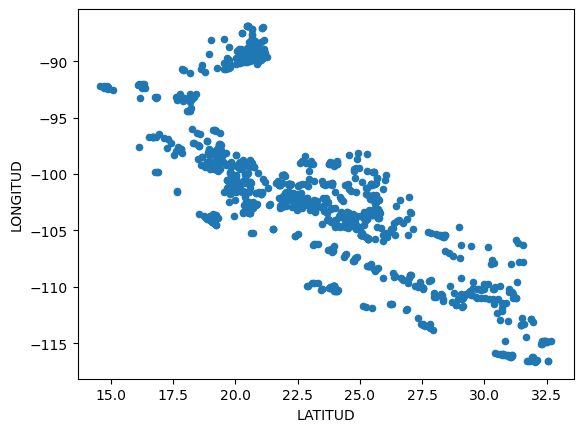

In [32]:
latlong.plot.scatter( "LATITUD","LONGITUD")

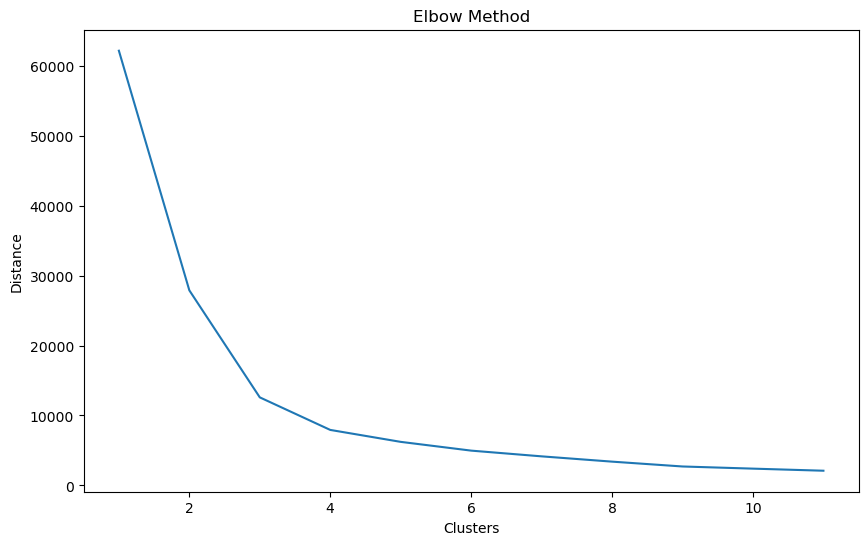

In [33]:
from sklearn.cluster import KMeans
import geopandas as gpd
from shapely.geometry import Point
K = range(1,12)
distance=[]

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1, n_init=20).fit(latlong)
    distance.append(kmeans.inertia_) 

plt.figure(figsize=(10, 6))
plt.plot(K, distance)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Distance')
plt.show()

# NÚMERO OPTIMO ES 3 CLUSTERS

In [34]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmean_p = kmeans.fit_predict(latlong) # Nos dice a que cluster pertenece cada ubicacion
countTotal = np.bincount(kmean_p)
print(countTotal)
print(kmeans.cluster_centers_) # Latitud y longitud de los lugares optimos

[228 178 623]
[[  28.3791345  -110.79171718]
 [  19.48348352  -90.68545963]
 [  22.24011224 -101.67273551]]


In [35]:
map_colors = {0: 'red', 1: 'cyan', 2: 'green'}
kmeans_pred_colors = [map_colors[v] for v in kmean_p]

In [36]:
# Obtener las ciudades de cada almacen
from geopy.geocoders import Nominatim
centers = kmeans.cluster_centers_
geolocator = Nominatim(user_agent="kmeans_app")
locations = []
for i in range(len(centers)):
  location = geolocator.reverse(str(centers[i][0]) + "," + str(centers[i][1]))
  locations.append(location.address)
  print(f'Location {i+1}: {location.address}')

Location 1: La Cieneguita, Guaymas, Sonora, México
Location 2: Ciudad del Sol, Champotón, Campeche, México
Location 3: Pinos, Zacatecas, México


In [37]:
sitios = pd.DataFrame()
sitios['LocationName'] = locations
sitios[['Latitude', 'Longitude']] = centers
sitios["Coordinates"] = list(zip(sitios.Longitude, sitios.Latitude))
sitios["Coordinates"] = sitios["Coordinates"].apply(Point)

In [38]:
final_df["Coordinates"] = list(zip(final_df.LONGITUD, final_df.LATITUD))
final_df["Coordinates"] = final_df["Coordinates"].apply(Point)
final_df.head()

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,N_NO3_mg/L,CALIDAD_ALC_Alta,CALIDAD_ALC_Baja,...,CUMPLE_CON_HG_NO,CUMPLE_CON_HG_SI,CUMPLE_CON_PB_NO,CUMPLE_CON_PB_SI,CUMPLE_CON_MN_NO,CUMPLE_CON_MN_SI,CUMPLE_CON_FE_NO,CUMPLE_CON_FE_SI,SEMAFORO,Coordinates
0,-102.02210,22.20887,229.990,940.0,603.599976,0.9766,213.731995,4.184656,1,0,...,0,1,0,1,0,1,0,1,Verde,POINT (-102.0221 22.20887)
1,-102.20075,21.99958,231.990,608.0,445.399994,0.9298,185.051407,5.750110,1,0,...,0,1,0,1,0,1,0,1,Verde,POINT (-102.20075 21.999579999999998)
2,-102.28801,22.36685,204.920,532.0,342.000000,1.8045,120.719002,1.449803,1,0,...,0,1,0,1,0,1,0,1,Rojo,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,327.000,686.0,478.600006,1.1229,199.878998,1.258597,1,0,...,0,1,0,1,0,1,0,1,Verde,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,309.885,1841.0,1179.000000,0.2343,476.987213,15.672251,1,0,...,0,1,0,1,0,1,0,1,Rojo,POINT (-110.2448 23.45138)


In [39]:
gdf = gpd.GeoDataFrame(final_df, geometry="Coordinates")
gdf.head()

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,N_NO3_mg/L,CALIDAD_ALC_Alta,CALIDAD_ALC_Baja,...,CUMPLE_CON_HG_NO,CUMPLE_CON_HG_SI,CUMPLE_CON_PB_NO,CUMPLE_CON_PB_SI,CUMPLE_CON_MN_NO,CUMPLE_CON_MN_SI,CUMPLE_CON_FE_NO,CUMPLE_CON_FE_SI,SEMAFORO,Coordinates
0,-102.02210,22.20887,229.990,940.0,603.599976,0.9766,213.731995,4.184656,1,0,...,0,1,0,1,0,1,0,1,Verde,POINT (-102.02210 22.20887)
1,-102.20075,21.99958,231.990,608.0,445.399994,0.9298,185.051407,5.750110,1,0,...,0,1,0,1,0,1,0,1,Verde,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,204.920,532.0,342.000000,1.8045,120.719002,1.449803,1,0,...,0,1,0,1,0,1,0,1,Rojo,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,327.000,686.0,478.600006,1.1229,199.878998,1.258597,1,0,...,0,1,0,1,0,1,0,1,Verde,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,309.885,1841.0,1179.000000,0.2343,476.987213,15.672251,1,0,...,0,1,0,1,0,1,0,1,Rojo,POINT (-110.24480 23.45138)


In [40]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,889953.0,Oceania,Fiji,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,58005463.0,Africa,Tanzania,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253.0,Africa,W. Sahara,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,37589262.0,North America,Canada,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,328239523.0,North America,United States of America,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [41]:
sitios_gpd = gpd.GeoDataFrame(sitios, geometry="Coordinates")
sitios_gpd.head()

,LocationName,Latitude,Longitude,Coordinates
0,"La Cieneguita, Guaymas, Sonora, México",28.379134,-110.791717,POINT (-110.79172 28.37913)
1,"Ciudad del Sol, Champotón, Campeche, México",19.483484,-90.685460,POINT (-90.68546 19.48348)
2,"Pinos, Zacatecas, México",22.240112,-101.672736,POINT (-101.67274 22.24011)


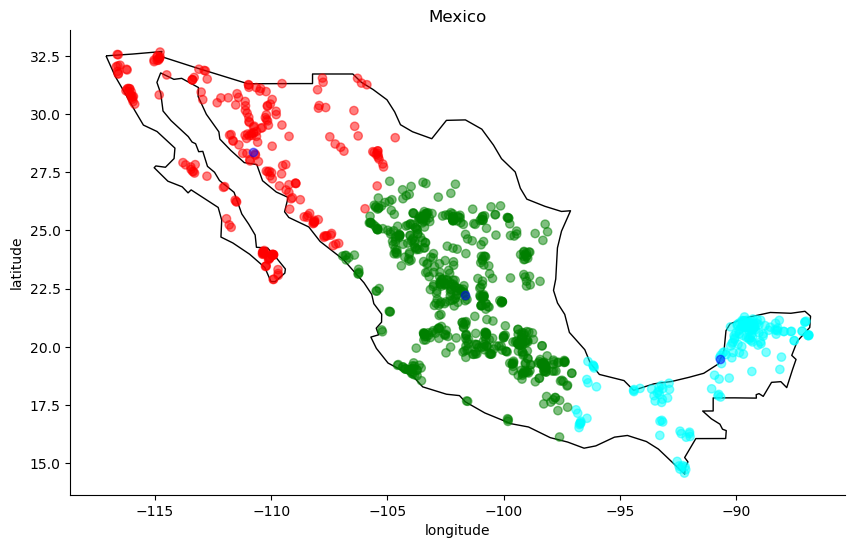

In [42]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color=kmeans_pred_colors, alpha = 0.5)
sitios_gpd.plot(ax=gax, color='blue', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()